# Predictive Analysis of Street Light operations: Exploring environmental factors and Fault Detection in Urban Lighting Infrastructure

In [1]:
#importing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
import os
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [17]:
#uploading dataset

In [2]:
df = pd.read_csv(r'datasets/dataset.csv')
df.head()

,bulb_number,timestamp,power_consumption (Watts),voltage_levels (Volts),current_fluctuations (Amperes),temperature (Celsius),environmental_conditions,current_fluctuations_env (Amperes),fault_type
0,1,2023-09-06 07:53:23,106.18,238.52,6.127984,21.97,Rainy,0.780000,1
1,1,2023-03-28 16:28:29,58.71,235.99,3.010000,24.16,Clear,0.100000,0
2,1,2023-09-20 19:17:46,195.49,234.97,1.060000,13.64,Rainy,0.920000,0
3,1,2023-02-03 18:19:43,95.64,225.74,2.160000,15.82,Rainy,3.060000,0
4,1,2023-01-12 13:43:48,70.92,218.76,1.830000,19.12,Rainy,6.529021,4


In [3]:
#data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34310 entries, 0 to 34309
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   bulb_number                         34310 non-null  int64  
 1   timestamp                           34310 non-null  object 
 2   power_consumption (Watts)           34310 non-null  float64
 3   voltage_levels (Volts)              34310 non-null  float64
 4   current_fluctuations (Amperes)      34310 non-null  float64
 5   temperature (Celsius)               34310 non-null  float64
 6   environmental_conditions            34310 non-null  object 
 7   current_fluctuations_env (Amperes)  34310 non-null  float64
 8   fault_type                          34310 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 2.4+ MB


In [5]:
Label =  ('No fault', 'Short circuit', 'Voltage Surge', 'Bulb failure', 'Light Flickering')
Label

('No fault',
 'Short circuit',
 'Voltage Surge',
 'Bulb failure',
 'Light Flickering')

In [6]:
#Data Visulazation

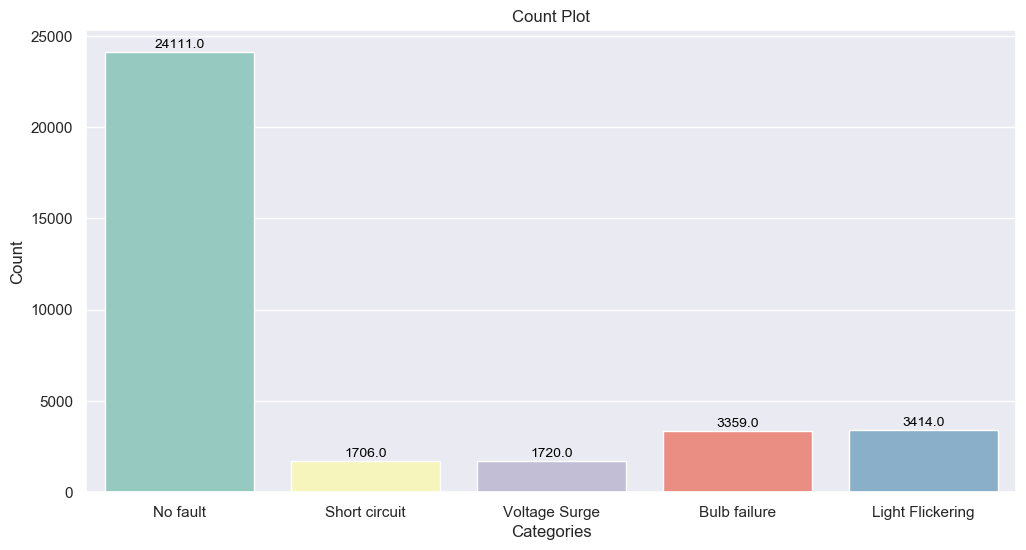

In [7]:
sns.set(style="darkgrid") 
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(x=df['fault_type'], data=df, palette="Set3")
plt.title("Count Plot")  
plt.xlabel("Categories") 
plt.ylabel("Count") 
ax.set_xticklabels(Label)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  

In [8]:
#Label Encoding

In [9]:
le = LabelEncoder()
df['environmental_conditions']=le.fit_transform(df['environmental_conditions'])
df.head()

,bulb_number,timestamp,power_consumption (Watts),voltage_levels (Volts),current_fluctuations (Amperes),temperature (Celsius),environmental_conditions,current_fluctuations_env (Amperes),fault_type
0,1,2023-09-06 07:53:23,106.18,238.52,6.127984,21.97,2,0.780000,1
1,1,2023-03-28 16:28:29,58.71,235.99,3.010000,24.16,0,0.100000,0
2,1,2023-09-20 19:17:46,195.49,234.97,1.060000,13.64,2,0.920000,0
3,1,2023-02-03 18:19:43,95.64,225.74,2.160000,15.82,2,3.060000,0
4,1,2023-01-12 13:43:48,70.92,218.76,1.830000,19.12,2,6.529021,4


In [10]:
#Data Visulazation

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

print(df.head())

   bulb_number           timestamp  power_consumption (Watts)  \
0            1 2023-09-06 07:53:23                     106.18   
1            1 2023-03-28 16:28:29                      58.71   
2            1 2023-09-20 19:17:46                     195.49   
3            1 2023-02-03 18:19:43                      95.64   
4            1 2023-01-12 13:43:48                      70.92   

   voltage_levels (Volts)  current_fluctuations (Amperes)  \
0                  238.52                        6.127984   
1                  235.99                        3.010000   
2                  234.97                        1.060000   
3                  225.74                        2.160000   
4                  218.76                        1.830000   

   temperature (Celsius)  environmental_conditions  \
0                  21.97                         2   
1                  24.16                         0   
2                  13.64                         2   
3                  15.82  

In [12]:
df.describe()

,bulb_number,power_consumption (Watts),voltage_levels (Volts),current_fluctuations (Amperes),temperature (Celsius),environmental_conditions,current_fluctuations_env (Amperes),fault_type,year,month,day,hour,minute,second
count,34310.000000,34310.000000,34310.000000,34310.000000,34310.000000,34310.000000,34310.000000,34310.000000,34310.0,34310.000000,34310.000000,34310.000000,34310.000000,34310.000000
mean,47.500000,123.089437,225.694952,2.665172,20.026780,0.985427,2.865040,0.841708,2023.0,6.538910,15.753629,11.515564,29.625036,29.271408
std,27.134323,43.484856,9.324979,1.648494,5.772737,0.837468,1.804107,1.419514,0.0,3.436255,8.774445,6.938375,17.359422,17.323430
min,1.000000,21.518042,210.000000,0.000000,10.000000,0.000000,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,24.000000,85.929269,217.740000,1.310000,15.020000,0.000000,1.400000,0.000000,2023.0,4.000000,8.000000,6.000000,15.000000,14.000000
50%,47.500000,123.241718,225.660000,2.600000,20.040000,1.000000,2.800000,0.000000,2023.0,7.000000,16.000000,12.000000,30.000000,29.000000
75%,71.000000,160.149951,233.250000,3.900000,25.030000,2.000000,4.110000,1.000000,2023.0,10.000000,23.000000,18.000000,45.000000,44.000000
max,94.000000,200.000000,259.305759,9.960166,30.000000,2.000000,9.882978,4.000000,2023.0,12.000000,31.000000,23.000000,59.000000,59.000000


In [13]:
#data Correlection

In [14]:
#Checking NULL values

In [15]:
df.isnull().sum()

bulb_number                           0
timestamp                             0
power_consumption (Watts)             0
voltage_levels (Volts)                0
current_fluctuations (Amperes)        0
temperature (Celsius)                 0
environmental_conditions              0
current_fluctuations_env (Amperes)    0
fault_type                            0
year                                  0
month                                 0
day                                   0
hour                                  0
minute                                0
second                                0
dtype: int64

In [16]:
#Declaring independent and dependent variable

In [17]:
x = df.drop(['fault_type','timestamp'],axis = 1)
x.head()

,bulb_number,power_consumption (Watts),voltage_levels (Volts),current_fluctuations (Amperes),temperature (Celsius),environmental_conditions,current_fluctuations_env (Amperes),year,month,day,hour,minute,second
0,1,106.18,238.52,6.127984,21.97,2,0.780000,2023,9,6,7,53,23
1,1,58.71,235.99,3.010000,24.16,0,0.100000,2023,3,28,16,28,29
2,1,195.49,234.97,1.060000,13.64,2,0.920000,2023,9,20,19,17,46
3,1,95.64,225.74,2.160000,15.82,2,3.060000,2023,2,3,18,19,43
4,1,70.92,218.76,1.830000,19.12,2,6.529021,2023,1,12,13,43,48


In [18]:
y = df['fault_type']
y

0        1
1        0
2        0
3        0
4        4
        ..
34305    3
34306    3
34307    0
34308    0
34309    0
Name: fault_type, Length: 34310, dtype: int64

In [19]:
#Data Balancing

In [20]:
smote = SMOTE(random_state=42)
x,y = smote.fit_resample(x,y)

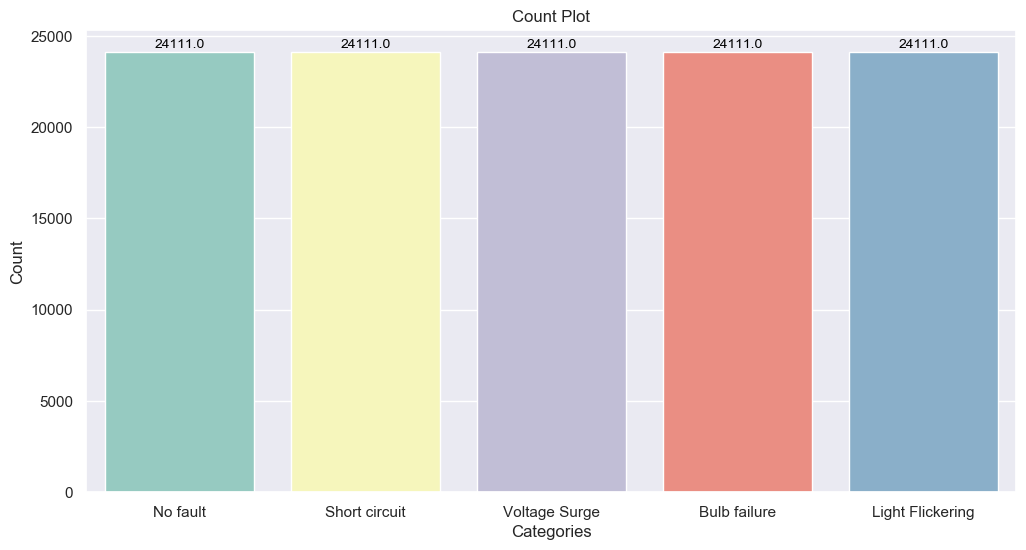

In [21]:
sns.set(style="darkgrid") 
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(x=y, data=df, palette="Set3")
plt.title("Count Plot")  
plt.xlabel("Categories") 
plt.ylabel("Count") 
ax.set_xticklabels(Label)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  

In [22]:
#Data Splitting

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [24]:
x_train.shape

(84388, 13)

In [25]:
#performance evalution

In [26]:
precision = []
recall = []
fscore = []
accuracy = []


def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int64')
    predict = predict.astype('int64')
    p = precision_score(testY, predict, average='macro') * 100
    r = recall_score(testY, predict, average='macro') * 100
    f = f1_score(testY, predict, average='macro') * 100
    a = accuracy_score(testY, predict) * 100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm + ' Accuracy    : ' + str(a))
    print(algorithm + ' Precision   : ' + str(p))
    print(algorithm + ' Recall      : ' + str(r))
    print(algorithm + ' FSCORE      : ' + str(f))
    report = classification_report(testY, predict, target_names=Label)
    print('\n' + algorithm + " classification report\n" + report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize=(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels=Label, yticklabels=Label, annot=True, cmap="Blues", fmt="g")
    ax.set_ylim([0, len(Label)])
    plt.title(algorithm + " Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

In [27]:
#KNearestNeighbours Classifier model building

KNearestNeighbours Classifier Accuracy    : 86.99090330964691
KNearestNeighbours Classifier Precision   : 88.41502839752819
KNearestNeighbours Classifier Recall      : 87.05170818413688
KNearestNeighbours Classifier FSCORE      : 84.83293790475929

KNearestNeighbours Classifier classification report
                  precision    recall  f1-score   support

        No fault       0.97      0.39      0.55      7269
   Short circuit       0.86      1.00      0.93      7274
   Voltage Surge       0.90      1.00      0.95      7173
    Bulb failure       0.83      0.98      0.90      7339
Light Flickering       0.84      0.99      0.91      7112

        accuracy                           0.87     36167
       macro avg       0.88      0.87      0.85     36167
    weighted avg       0.88      0.87      0.85     36167



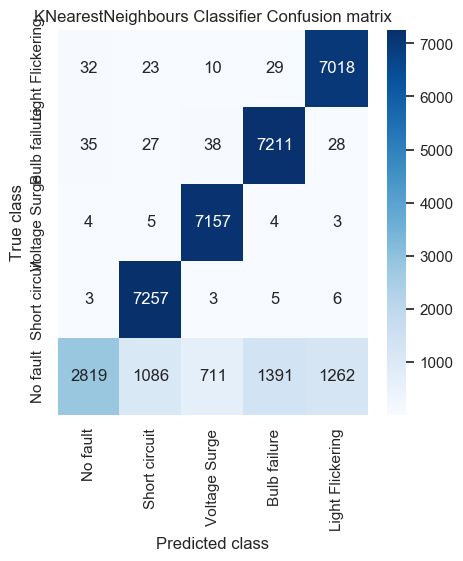

In [28]:
KMeans = 'model/KNN.npy'
if os.path.exists(KMeans):
    classifier = np.load(KMeans, allow_pickle = True).item()
else:                       
    classifier = KNeighborsClassifier()
    classifier.fit(x_train, y_train)
    np.save('model/KNN', classifier)

y_pred = classifier.predict(x_test)
# Evaluate the model
performance_metrics('KNearestNeighbours Classifier', y_pred, y_test)

RandomForestClassifier Accuracy    : 93.54383830563773
RandomForestClassifier Precision   : 93.65290582605601
RandomForestClassifier Recall      : 93.55426852141987
RandomForestClassifier FSCORE      : 93.5415433134498

RandomForestClassifier classification report
                  precision    recall  f1-score   support

        No fault       0.89      0.83      0.86      7269
   Short circuit       0.99      0.98      0.98      7274
   Voltage Surge       0.96      0.97      0.96      7173
    Bulb failure       0.88      0.95      0.91      7339
Light Flickering       0.98      0.95      0.96      7112

        accuracy                           0.94     36167
       macro avg       0.94      0.94      0.94     36167
    weighted avg       0.94      0.94      0.94     36167



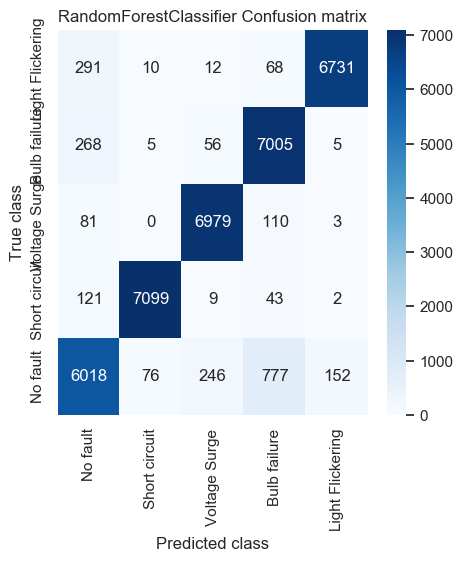

In [29]:
KMeans = 'model/RFC.joblib'

if os.path.exists(KMeans):
    classifier1 = joblib.load(KMeans)
else:                       
    classifier1 = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
    classifier1.fit(x_train, y_train)
    joblib.dump(classifier1, 'model/RFC.joblib')

y_pred3 = classifier1.predict(x_test)
# Evaluate the model
performance_metrics('RandomForestClassifier', y_pred3, y_test)

In [30]:
#Tabular form of Performance Metrics

In [31]:
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["KNearestNeighbours Classifier", "Random Forest Classifier"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,KNearestNeighbours Classifier,88.415028,87.051708,84.832938,86.990903
1,Random Forest Classifier,93.652906,93.554269,93.541543,93.543838


In [32]:
#Uploading testing dataset

In [33]:
test=pd.read_csv("datasets/test.csv")

In [34]:
le = LabelEncoder()
test['environmental_conditions']=le.fit_transform(test['environmental_conditions'])

test['timestamp'] = pd.to_datetime(test['timestamp'])

test['year'] = test['timestamp'].dt.year
test['month'] = test['timestamp'].dt.month
test['day'] = test['timestamp'].dt.day
test['hour'] = test['timestamp'].dt.hour
test['minute'] = test['timestamp'].dt.minute
test['second'] = test['timestamp'].dt.second
test = test.drop(['timestamp'], axis = 1)
test.head()

,bulb_number,power_consumption (Watts),voltage_levels (Volts),current_fluctuations (Amperes),temperature (Celsius),environmental_conditions,current_fluctuations_env (Amperes),year,month,day,hour,minute,second
0,1,106.18,238.52,6.127984,21.97,2,0.780000,2023,6,9,7,53,0
1,1,58.71,235.99,3.010000,24.16,0,0.100000,2023,3,28,16,28,0
2,1,195.49,234.97,1.060000,13.64,2,0.920000,2023,9,20,19,17,0
3,1,95.64,225.74,2.160000,15.82,2,3.060000,2023,3,2,18,19,0
4,1,70.92,218.76,1.830000,19.12,2,6.529021,2023,12,1,13,43,0


In [35]:
#Model prediction on test data

In [36]:
predict = classifier1.predict(test)

for i, p in enumerate(predict):
    if p == 0:
        print(test.iloc[i]) 
        print("Model Predicted of Row {} in Test Data is".format(i),Label[0])
    elif p == 1:
        print(test.iloc[i])  
        print("Model Predicted of Row {} in Test Data is".format(i),Label[1])
    elif p == 2:
        print(test.iloc[i])  
        print("Model Predicted of Row {} in Test Data is".format(i),Label[2])
    elif p == 3:
        print(test.iloc[i])
        print("Model Predicted of Row {} in Test Data is".format(i),Label[3])
    else:
        print(test.iloc[i])  
        print("Model Predicted of Row {} in Test Data is".format(i),Label[4])
        

bulb_number                              1.000000
power_consumption (Watts)              106.180000
voltage_levels (Volts)                 238.520000
current_fluctuations (Amperes)           6.127984
temperature (Celsius)                   21.970000
environmental_conditions                 2.000000
current_fluctuations_env (Amperes)       0.780000
year                                  2023.000000
month                                    6.000000
day                                      9.000000
hour                                     7.000000
minute                                  53.000000
second                                   0.000000
Name: 0, dtype: float64
Model Predicted of Row 0 in Test Data is Short circuit
bulb_number                              1.00
power_consumption (Watts)               58.71
voltage_levels (Volts)                 235.99
current_fluctuations (Amperes)           3.01
temperature (Celsius)                   24.16
environmental_conditions                 